In [ ]:
%matplotlib inline

import os
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
import tensorflow.keras.optimizers as tfo
from tensorflow.keras.metrics import *
from tensorflow.keras.preprocessing.image import *

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

In [ ]:
generator = ImageDataGenerator(
    # Your code here
    rotation_range=40 #rotation can be apply into -40 into 40

)


In [ ]:
#Get access for the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


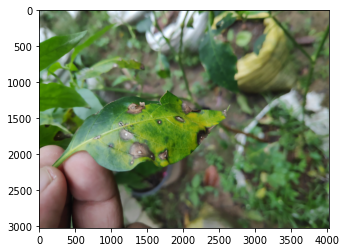

In [ ]:
image_path = 'drive/My Drive/Augmentation/Train/KL.jpg'

plt.imshow(plt.imread(image_path));

Found 2 images belonging to 1 classes.


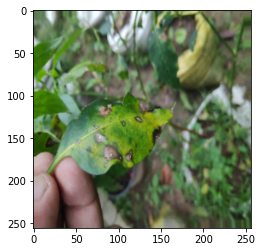

In [ ]:
x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
generator = ImageDataGenerator(
    # Your code here
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50, 0, 50]
)

#this is not suitable aumentation methds.bcz some times we cannot identify features correctly.


Found 1 images belonging to 1 classes.


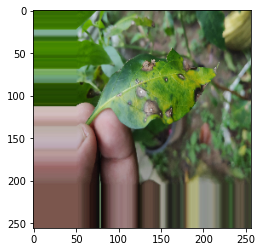

In [ ]:
x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


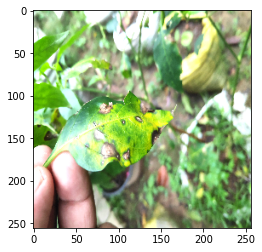

In [ ]:
generator = ImageDataGenerator(
    # Your code here
    brightness_range=[0.5, 2.]
)



x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


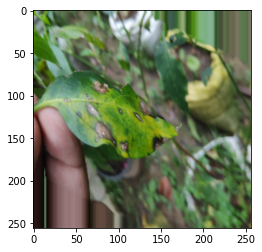

In [ ]:
generator = ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


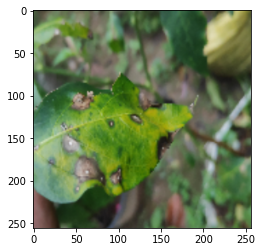

In [ ]:

generator = ImageDataGenerator(
    # Your code here
    zoom_range=[0.5, 1.2]
)

x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

Found 1 images belonging to 1 classes.


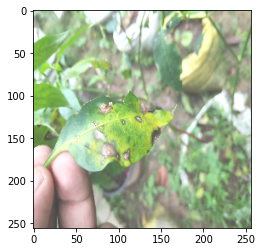

In [ ]:

generator = ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
x.mean()

201.73036

In [ ]:
np.array(Image.open(image_path)).mean()

98.89253326234044

Found 1 images belonging to 1 classes.


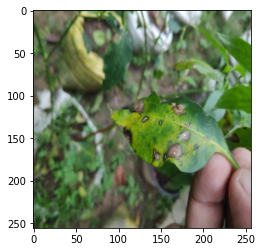

In [ ]:
generator = ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip = False,
    rotation_range=30
)

x, y = next(generator.flow_from_directory('drive/My Drive/Augmentation', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [ ]:
# Uploaded dataset is in google drive.
train_dir ="drive/My Drive/Research/Tomato___Bacterial_spot/Train/"
test_dir="drive/My Drive/Research/Tomato___Bacterial_spot/Test/"

In [ ]:
#train_dir ="drive/My Drive/Augmentation"

In [ ]:
#def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
 #   all_files = glob.glob(os.path.join(root, '*.ipynb'))

    #initialize variables
  #  x = np.empty([0, 784])
  #  y = np.empty([0])
  #  class_names = []

    #load each data file
   # for idx, file in enumerate(all_files):
    #    data = np.load(file)
     #   data = data[0: max_items_per_class, :]
      #  labels = np.full(data.shape[0], idx)

       # x = np.concatenate((x, data), axis=0)
       # y = np.append(y, labels)

      #  class_name, ext = os.path.splitext(os.path.basename(file))
       # class_names.append(class_name)

    #data = None
    #labels = None

    #randomize the dataset
   # permutation = np.random.permutation(y.shape[0])
    #x = x[permutation, :]
    #y = y[permutation]

    #separate into training and testing
    #vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    #x_test = x[0:vfold_size, :]
    #y_test = y[0:vfold_size]

   # x_train = x[vfold_size:x.shape[0], :]
   # y_train = y[vfold_size:y.shape[0]]
   # return x_train, y_train, x_test, y_test, class_names

In [ ]:
#import os
#import glob
#import numpy as np
#from tensorflow.keras import layers
#from tensorflow import keras
#import tensorflow as tf

In [ ]:
#x_train, y_train, x_test, y_test, class_names = load_data('Train')
#num_classes = len(class_names)
#image_size = 28


#generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
#    featurewise_center = True,
#    featurewise_std_normalization=True
#)

#generator.fit(x_train)

In [ ]:
#print(len(x_train))

0


In [ ]:
# Uploaded dataset is in google drive.
train_dir ="/content/drive/MyDrive/Research_new/Train"
test_dir="/content/drive/MyDrive/Research_new/Test"

In [ ]:
#####

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(train_dir, target_size=[224, 224], classes =['0', '1', '2'], batch_size = 40, class_mode =  'sparse')

Found 2600 images belonging to 3 classes.


In [ ]:
vald_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input).flow_from_directory(test_dir, target_size=[224, 224], classes =['0', '1', '2'], batch_size = 40, class_mode =  'sparse')

Found 600 images belonging to 3 classes.


In [ ]:
#loadng the prebuilt model
vgg16_myMod = vgg16.VGG16(weights='imagenet')
vgg16_seq = Sequential()
for layer in  vgg16_myMod.layers[0:len(vgg16_myMod.layers)-1]:
  vgg16_seq.add(layer)

vgg16_seq.add(Dense(3))
vgg16_seq.add(Activation('softmax'))
#vgg16_seq.summary()

###optimizing and compiling
##adam compiler
adam = tfo.Adam(learning_rate=0.01)
vgg16_seq.compile(loss='sparse_categorical_crossentropy', optimizer=adam)
vgg16_seq.fit_generator(train_batches, steps_per_epoch=65, validation_data=vald_batches, validation_steps=50, epochs=100, verbose=2)##epochs 2600/40

vgg16_seq.save('VGG1_1.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
65/65 - 394s - loss: 4325974474752.0000 - val_loss: 11425.9844
Epoch 2/100
65/65 - 35s - loss: 10868.7090
Epoch 3/100
65/65 - 34s - loss: 317.3078
Epoch 4/100
65/65 - 34s - loss: 29.6684
Epoch 5/100
65/65 - 34s - loss: 1.4191
Epoch 6/100
65/65 - 34s - loss: 1.2084
Epoch 7/100
65/65 - 34s - loss: 1.2047
Epoch 8/100
65/65 - 34s - loss: 21.5301
Epoch 9/100
65/65 - 34s - loss: 6.7313
Epoch 10/100
65/65 - 34s - loss: 3.2377
Epoch 11/100
65/65 - 34s - loss: 1.1732
Epoch 12/100
65/65 - 34s - loss: 1.1000
Epoch 13/100
65/65 - 34s - loss: 1.1028
Epoch 14/100
65/65 - 34s - loss: 1.1078
Epoch 15/100
65/65 - 34s - loss: 1.1010
Epoch 16/100
65/65 - 34s - loss: 1.0993
Epoch 17/100
65/65 - 34s - loss: 1.1049
Epoch 18/100
65/65 - 34s - loss: 1.0997
Epoch 19/100
65/65 - 34s - loss: 1.1015
Epoch 20/100
65/65 - 34s - loss: 1.1195
Epoch 21/100
65/65 - 34s - loss: 1.1142
Epoch 22/100
65/65 - 34s - loss: 1.1729
Epoch 23/100
65/65 - 34s - loss: 1.1038
Epoch 24/100
65/65 - 34s - loss: 1.1066
Epoch

In [ ]:
###Research/train,  test / 0 1 2

In [ ]:
import cv2

In [ ]:
##make prediction
img1 = cv2.imread('/content/drive/MyDrive/Research_new/Test/1/image (1711).JPG')
img1 = cv2.resize(img1, (224, 224), interpolation = cv2.INTER_LINEAR)
print(img1.shape)
img1 = np.expand_dims(img1,axis=0)
MyModel = load_model('/content/drive/MyDrive/VGG1_1.h5', compile=False)
output = MyModel.predict(img1)
print(output)


(224, 224, 3)
[[0.26415902 0.24666043 0.48918056]]


In [ ]:
#/content/drive/MyDrive/Research_new/Test/0/image (809).JPG
#(224, 224, 3)
#[[0.26415902 0.24666043 0.48918056]]

In [ ]:
###2nd try

In [ ]:
train_batches.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
dir(train_batches)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [ ]:
train_batches.num_classes

3

In [ ]:
#loadng the prebuilt model
vgg16_myMod = vgg16.VGG16(weights='imagenet')
vgg16_seq = Sequential()
for layer in  vgg16_myMod.layers[0:len(vgg16_myMod.layers)-1]:
  vgg16_seq.add(layer)

vgg16_seq.add(Dense(3))
vgg16_seq.add(Activation('softmax'))
#vgg16_seq.summary()

###optimizing and compiling
##adam compiler
adam = tfo.Adam(learning_rate=0.01)
vgg16_seq.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
vgg16_seq.fit(train_batches, steps_per_epoch=65, validation_data=vald_batches, validation_steps=10, epochs=100, verbose=2)##epochs 2600/40

vgg16_seq.save('VGG1_2.h5')

553467904/553467096 [==============================] - 3s 0us/step
Epoch 1/100
65/65 - 1236s - loss: 17706925424640.0000 - accuracy: 0.3262 - val_loss: 207.9672 - val_accuracy: 0.3325
Epoch 2/100
65/65 - 77s - loss: 113.2584 - accuracy: 0.3304 - val_loss: 25.7219 - val_accuracy: 0.3300
Epoch 3/100
65/65 - 45s - loss: 12.1815 - accuracy: 0.3431 - val_loss: 2.0444 - val_accuracy: 0.3275
Epoch 4/100
65/65 - 37s - loss: 1.4860 - accuracy: 0.3381 - val_loss: 1.2222 - val_accuracy: 0.3400
Epoch 5/100
65/65 - 34s - loss: 1.2627 - accuracy: 0.3396 - val_loss: 1.6882 - val_accuracy: 0.3200
Epoch 6/100
65/65 - 34s - loss: 1.1699 - accuracy: 0.3438 - val_loss: 1.1549 - val_accuracy: 0.3325
Epoch 7/100
65/65 - 35s - loss: 1.1730 - accuracy: 0.3308 - val_loss: 1.1701 - val_accuracy: 0.3225
Epoch 8/100
65/65 - 34s - loss: 1.1625 - accuracy: 0.3458 - val_loss: 1.1334 - val_accuracy: 0.3300
Epoch 9/100
65/65 - 34s - loss: 1.2146 - accuracy: 0.3569 - val_loss: 1.7169 - val_accuracy: 0.3200
Epoch 10/100

In [ ]:
dir(MyModel)

In [ ]:
##make prediction

img2 = cv2.imread('/content/drive/MyDrive/Research_new/Test/0/image (823).JPG')
img2 = cv2.resize(img2, (224, 224), interpolation = cv2.INTER_LINEAR)
print(img2.shape)
img2 = np.expand_dims(img2,axis=0)
img2 = vgg16.preprocess_input(img2)
MyModel2 = load_model('/content/drive/MyDrive/VGG1_2.h5', compile=False)
output = MyModel2.predict(img2)
print(output)

(224, 224, 3)
[[0.4430165  0.15250057 0.40448287]]


In [ ]:
#(224, 224, 3)
#WARNING:tensorflow:6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fe47606d7b8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
#[[0.3349328 0.4147714 0.2502958]]

In [ ]:
#dir(MyModel2)

In [ ]:
mnist dataset

In [ ]:
#####

In [ ]:
####inception v3

import cv2
import tensorflow.keras as tk
import numpy as np
import os

In [ ]:
#data preprocessing
img_height = 299
img_width = 299

x_image_list = os.listdir('/content/drive/MyDrive/InceptionV3')
#y_image_list = os.listchar()
a = np.zeros([200])
b = np.ones([200])
c = 2*np.ones([200])
y = np.append(a,b,axis=0)
y = np.append(y,c,axis=0)


In [ ]:
X = np.zeros((len(x_image_list), img_height, img_width, 3), dtype=np.float32)
#y = #give the array  you want, just the numerical labels of  above images

for image_file in x_image_list:
    n = x_image_list.index(image_file)
    path = os.path.join('/content/drive/MyDrive/InceptionV3', image_file)
    img =cv2.imread(path, 1)
    img = cv2.resize(img, (img_height, img_width), interpolation=cv2.INTER_AREA)
    img = img/255
    X[n] = img


In [ ]:
X.shape

(600, 299, 299, 3)

In [ ]:
#model architecture building
base_model = tk.applications.InceptionV3(weights = 'imagenet')
base_input_layer = base_model.layers[0].input  #tk.layers.Input(shape=(img_width, img_height, 3))
base_output_layer = base_model.layers[-2].output
final_output = tk.layers.Dense(3)(base_output_layer)

new_model = tk.Model(inputs = base_input_layer, outputs = final_output)

In [ ]:
#compiling
new_model.compile(tk.optimizers.Adam(), loss = tk.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

new_model.fit(X, y, batch_size = 40, epochs = 100, verbose = 2)
new_model.save('inception1.h5')

Epoch 1/100
15/15 - 16s - loss: 0.7564 - accuracy: 0.7400
Epoch 2/100
15/15 - 8s - loss: 0.3343 - accuracy: 0.8917
Epoch 3/100
15/15 - 8s - loss: 0.2247 - accuracy: 0.9317
Epoch 4/100
15/15 - 8s - loss: 0.1137 - accuracy: 0.9650
Epoch 5/100
15/15 - 8s - loss: 0.0813 - accuracy: 0.9733
Epoch 6/100
15/15 - 8s - loss: 0.1341 - accuracy: 0.9517
Epoch 7/100
15/15 - 8s - loss: 0.1381 - accuracy: 0.9617
Epoch 8/100
15/15 - 8s - loss: 0.0829 - accuracy: 0.9717
Epoch 9/100
15/15 - 8s - loss: 0.0679 - accuracy: 0.9767
Epoch 10/100
15/15 - 8s - loss: 0.0706 - accuracy: 0.9767
Epoch 11/100
15/15 - 8s - loss: 0.0911 - accuracy: 0.9683
Epoch 12/100
15/15 - 8s - loss: 0.0983 - accuracy: 0.9667
Epoch 13/100
15/15 - 8s - loss: 0.0930 - accuracy: 0.9733
Epoch 14/100
15/15 - 8s - loss: 0.0336 - accuracy: 0.9933
Epoch 15/100
15/15 - 8s - loss: 0.0324 - accuracy: 0.9917
Epoch 16/100
15/15 - 8s - loss: 0.0218 - accuracy: 0.9967
Epoch 17/100
15/15 - 8s - loss: 0.0432 - accuracy: 0.9883
Epoch 18/100
15/15 - 8

In [ ]:
##make prediction
img1 = cv2.imread('/content/drive/MyDrive/InceptionV3/image (539).JPG')
img1 = cv2.resize(img1, (299, 299), interpolation = cv2.INTER_LINEAR)
print(img1.shape)
img1 = img1/255
img1 = np.expand_dims(img1,axis=0)
MyModel = load_model('/content/drive/MyDrive/inception1.h5', compile=False)
output = MyModel.predict(img1)
print(output)

(299, 299, 3)
[[-10.336323     0.61419344   6.43479   ]]


In [ ]:
########Resnet 50

In [ ]:
resnet.ResNet50

<function tensorflow.python.keras.applications.resnet.ResNet50>

In [ ]:
#data preprocessing
img_height = 224
img_width = 224

x_image_list = os.listdir('/content/drive/MyDrive/InceptionV3')
#y_image_list = os.listchar()
a = np.zeros([200])
b = np.ones([200])
c = 2*np.ones([200])
y = np.append(a,b,axis=0)
y = np.append(y,c,axis=0)

In [ ]:
X = np.zeros((len(x_image_list), img_height, img_width, 3), dtype=np.float32)
#y = #give the array  you want, just the numerical labels of  above images

for image_file in x_image_list:
    n = x_image_list.index(image_file)
    path = os.path.join('/content/drive/MyDrive/InceptionV3', image_file)
    img =cv2.imread(path, 1)
    img = cv2.resize(img, (img_height, img_width), interpolation=cv2.INTER_AREA)
    img = img/255
    X[n] = img

In [ ]:
X.shape

(600, 224, 224, 3)

In [ ]:
#model architecture building
base_model = tk.applications.resnet.ResNet50(weights = 'imagenet')
base_input_layer = base_model.layers[0].input  #tk.layers.Input(shape=(img_width, img_height, 3))
base_output_layer = base_model.layers[-2].output
final_output = tk.layers.Dense(3)(base_output_layer)

new_model = tk.Model(inputs = base_input_layer, outputs = final_output)

In [ ]:
#compiling
new_model.compile(tk.optimizers.Adam(), loss = tk.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

new_model.fit(X, y, batch_size = 40, epochs = 100, verbose = 2)
new_model.save('resnet.h5')

Epoch 1/100
15/15 - 11s - loss: 0.8422 - accuracy: 0.7633
Epoch 2/100
15/15 - 6s - loss: 0.6342 - accuracy: 0.8617
Epoch 3/100
15/15 - 6s - loss: 0.3977 - accuracy: 0.8833
Epoch 4/100
15/15 - 6s - loss: 0.3465 - accuracy: 0.8967
Epoch 5/100
15/15 - 6s - loss: 0.3004 - accuracy: 0.9217
Epoch 6/100
15/15 - 6s - loss: 0.2732 - accuracy: 0.9017
Epoch 7/100
15/15 - 6s - loss: 0.2132 - accuracy: 0.9267
Epoch 8/100
15/15 - 6s - loss: 0.1814 - accuracy: 0.9317
Epoch 9/100
15/15 - 6s - loss: 0.1168 - accuracy: 0.9583
Epoch 10/100
15/15 - 6s - loss: 0.1087 - accuracy: 0.9700
Epoch 11/100
15/15 - 6s - loss: 0.0705 - accuracy: 0.9767
Epoch 12/100
15/15 - 6s - loss: 0.0303 - accuracy: 0.9933
Epoch 13/100
15/15 - 6s - loss: 0.0164 - accuracy: 0.9983
Epoch 14/100
15/15 - 6s - loss: 0.0408 - accuracy: 0.9867
Epoch 15/100
15/15 - 6s - loss: 0.0492 - accuracy: 0.9850
Epoch 16/100
15/15 - 6s - loss: 0.1607 - accuracy: 0.9533
Epoch 17/100
15/15 - 6s - loss: 0.1748 - accuracy: 0.9417
Epoch 18/100
15/15 - 6

In [ ]:
##make prediction
img1 = cv2.imread('/content/drive/MyDrive/InceptionV3/image (220).JPG')
img1 = cv2.resize(img1, (224, 224), interpolation = cv2.INTER_LINEAR)
print(img1.shape)
img1 = img1/255
img1 = np.expand_dims(img1,axis=0)
MyModel = load_model('/content/resnet.h5', compile=False)
output = MyModel.predict(img1)
print(output)

(224, 224, 3)
[[-5.9256654 10.031743  -5.2123055]]
